# Ebola Model

Importing libraries: [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [matplotlib](https://matplotlib.org/)

In [1]:
import aux
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Model's equations:

$\lambda(t) = \frac{1}{N} * (\beta_i * I(t) + \beta_d * D(t))$

$\dot{S(t)} = -\lambda * S(t)$

$\dot{E(t)} = \lambda * S(t) - f * E(t)$

$\dot{I(t)} = f * E(t) - (m + r) * I(t)$

$\dot{R(t)} = r * I(t)$

$\dot{D(t)} = m * I(t) - \mu * D(t)$

$\dot{B(t)} = \mu * D(t)$

With variables:

* $S$: Susceptibles
* $E$: Exposed
* $I$: Infective
* $R$: Recovered
* $D$: Dead
* $B$: Buried
* $N$: Total population
* $\beta_i$: Infectious people contact rate
* $\beta_d$: Dead people contact rate
* $f$: Rate of progression from latent to infectious 
* $r$: Recovery rate
* $m$: Mortality rate
* $\mu$: Burying rate

And defining the model in code:

In [2]:
def dEbola(y, t, N, betaI, betaH, f, m, r, mu):
    S, E, I, R, D, B = y
    dSdt = -(betaI * I / N + betaH * D/N) * S
    dEdt = (betaI * I / N + betaH * D/N) * S - f * E
    dIdt = f * E - (m + r) * I
    dRdt = r * I
    dDdt = m * I - mu * D
    dBdt = mu * D
    return dSdt, dEdt, dIdt, dRdt, dDdt, dBdt

Setting the input parameters for the model:

In [3]:
(N, tmax) = (1000, 365)
(betaI, betaD) = (0.3, 1)
(f, r, m, mu) = (1/6, 1/10, 1/7.5, 1)
(eInit, iInit, rInit, dInit, bInit) = (0, 1, 0, 0, 0)

Calculating internal variables and running the model

In [4]:
# Initial population
sInit = N - (eInit + iInit + rInit + dInit + bInit)
t = np.linspace(0, tmax, tmax)
# Initial states vector
y0 = (sInit, eInit, iInit, rInit, dInit, bInit)
# Run model
ret = odeint(dEbola, y0, t, args=(N, betaI, betaD, f, m, r, mu))
(S, E, I, R, D, B) = ret.T

Plotting:

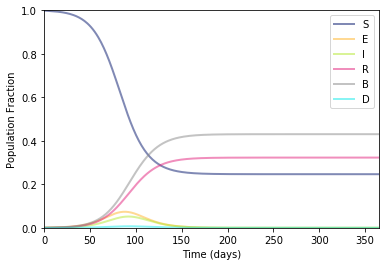

In [5]:
# Defining triplets: (series, color, label)
triplets = (
    (S, '#02146b', 'S'), (E, '#ffb428', 'E'), (I, '#b4e830', 'I'), 
    (R, '#e21e7b', 'R'), (B, '#888888', 'B'), (D, '#12eaea', 'D')
)
# Plotting
(fig, ax) = aux.plotEpiDynamics(triplets, t, tmax, N)